# LAB 2-1: Exploratory Data Analysis


## Overview

Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis.

# Shark Tank Introduction

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file https://raw.githubusercontent.com/dlsun/pods/master/data/sharktank.csv (from Dennis Sun's Principles of Data Science). Read in the data into a Pandas `DataFrame`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/dlsun/pods/master/data/sharktank.csv')
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
## YOUR CODE HERE
df = df.fillna(0)
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,Wispots,No,Business Services,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
## YOUR CODE HERE
df['Equity'] = df['Equity'].str.replace('%', '').astype(float) / 100
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
## YOUR CODE HERE
df = df.fillna(0)
df['Valuation'] = df['Amount'] * df['Equity']
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27500.0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,230000.0
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons? Avoid loops.

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [ ]:
sharks = ['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', "O'Leary", 'Harrington', 'Guest']
df['invest'] = df['Amount']/df[sharks].sum(axis=1)
df.fillna(0)

newdf=df[['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', "O'Leary", 'Harrington', 'Guest','invest']]
newdf.loc[:, sharks] = newdf[sharks].mul(newdf['invest'], axis=0)
newdf.fillna(0)
newdf.head()
newdf[sharks].sum(axis=0).sort_values(ascending=False)


,0
Cuban,17817500.0
Herjavec,16297500.0
Greiner,8170000.0
John,8154000.0
O'Leary,7952500.0
Corcoran,4912500.0
Harrington,800000.0
Guest,400000.0


**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Industry
Fitness / Sports         0.575000
Green/CleanTech          0.555556
Healthcare               0.555556
Media / Entertainment    0.545455
Food and Beverage        0.538462
Lifestyle / Home         0.528571
Children / Education     0.527273
Consumer Products        0.526316
Fashion / Beauty         0.462366
Software / Tech          0.454545
Pet Products             0.411765
Uncertain / Other        0.384615
Business Services        0.230769
Name: count, dtype: float64


<Axes: xlabel='Industry'>

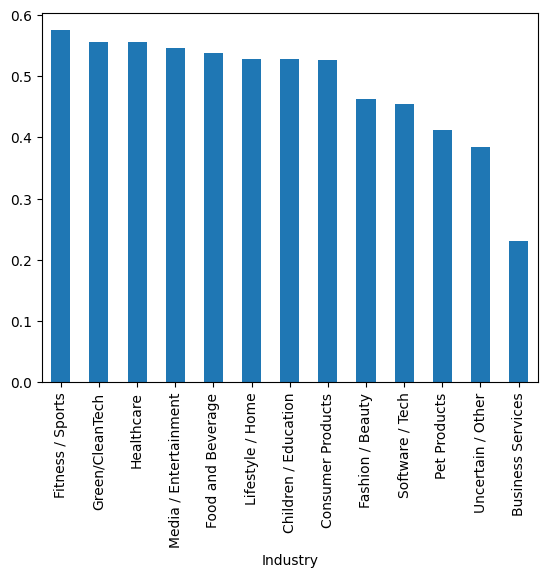

In [ ]:
## YOUR CODE HERE
df.groupby("Industry")['Amount'].sum().sort_values(ascending=False)
x=(df['Industry'].loc[df["Deal"]=='Yes'].value_counts()/df['Industry'].value_counts()).sort_values(ascending=False)
print(x)
x.plot(kind='bar')

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Responses

Please enter your responses in this notebook itself by creating new text or code cells, as needed.

# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---